Recurrent Neural Networks
===================================================

Τα επαναληπτικά νευρωνικά δίκτυα, Recurrent Neural Networks (RNNs), χρησιμοποιούν ακολουθίες δεδομένων (sequential data) ή χρονοσειρές (time series) για την επίλυση χρονικών προβλημάτων που συναντώνται σε tasks όπως η μετάφραση γλώσσας (language translation), η αναγνώριση ομιλίας (speech recognition), η προσθήκη λεζαντών σε εικόνες ή βίντεο (image/video captioning), η σύνθεση κίνησης (motion synthesis), κ.ά. Τόσο οι ακολουθίες δεδομένων όσο και οι χρονοσειρές είναι δεδομένα όπου υπάρχουν χρονικές συσχετίσεις από το ένα δείγμα στο επόμενο.

Το πιο βασικό τους χαρακτηριστικό είναι ότι οι κόμβοι κάθε layer του δικτύου έχουν τις ίδιες παραμέτρους, σε αντίθεση με τα feedforward δίκτυα όπου κάθε κόμβος έχει διαφορετικά βάρη. Ωστόσο, παρότι οι κόμβοι ενός RNN layer μοιράζονται τα ίδια βάρη, αυτά προσαρμόζονται με τη χρήση του backpropagation αλγορίθμου και της gradient decent όπως γνωρίζουμε. Ειδικότερα, τα RNNs εκπαιδεύονται με μια παραλλαγή του backpropagation αλγορίθμου, τον Backpropagation Through Time (BPTT), ο οποίος σε κάθε βήμα εκπαίδευσης αθροίζει τα σφάλματα, ενώ η "παραδοσιακή" προσέγγιση του backpropagation δεν χρειάζεται να κάνει άθροιση σφαλμάτων, καθώς οι παράμετροι των κόμβων ενός layer δεν μοιράζονται τις ίδιες παραμέτρους (βάρη και πολώσεις). Με λίγα λόγια ένα RNN μοντέλο έχει ένα "internal state" (αλλιώς hidden state ή διάνυσμα κατάστασης) το οποίο ανανεώνεται καθώς γίνεται η επεξεργασία μιας ακολουθίας δεδομένων.

Για κάθε στοιχείο της ακολουθίας εισόδου, κάθε layer υπολογίζει την ακόλουθη συναρτήση:

$h_t = f(x_t W_{xh}^T + b_{xh} + h_{t-1} W_{hh}^T + b_{hh}$)

όπου $h_t$ είναι το hidden state τη χρονική στιγμή $t$, $x_t$ είναι η είσοδος τη χρονική στιγμή $t$, και $h_{(t-1)}$ είναι το hidden state του προηγούμενου layer κατά τη χρονική στιγμή $t-1$ ή το αρχικό state τη χρονική στιγμή $0$. Τα $W_{xh}$ και $b_{xh}$ είναι τα βάρη και οι πολώσεις της τρέχουσας εισόδου και αντίστοιχα τα $W_{hh}$ και $b_{hh}$ τα βάρη και οι πολώσεις του προηγούμενου hidden state. Η συνάρτηση $f$ είναι οποιοδήποτε activation function που εισάγει μη γραμμικότητα στο μοντέλο, συνήθως ReLU ή tanh. Συνεπώς, παρατηρούμε πως ο ένας όρος μέσα στην $f$ βασίζεται στη προηγούμενη κατάσταση, ενώ ο άλλος όρος βασίζεται στην τρέχουσα είσοδο, με αποτέλεσμα κάθε έξοδος να επηρρεάζεται από όλες τις προηγούμενες εισόδους.

Αντίστοιχα, η έξοδος κάθε χρονική στιγμή υπολογίζεται ως εξής:

$y_t = W_{hy}h_t$

όπου το μητρώο $W_{hy}$ περιέχει τα βάρη του output layer.

Το namespace *torch.nn* περιέχει τη κλάση *nn.RNN* η οποία υλοποιεί ένα RNN layer. Τα βασικά ορίσματα της κλάσης αυτής είναι:

*   *input_size*: Ο αριθμός των features που θα πρέπει να έχει η είσοδος $x$
*   *hidden_size*: Ο αριθμός των features του hidden state *h* (το μέγεθός του)
*   *num_layers*: Ο αριθμός των recurrent layers. Για παράδειγμα θέτωντάς των ως ``` num layers=2```
σημαίνει ότι "στοιβάζουμε" 2 RNNs μαζί για να δημιουργήσουμε ένα RNN στοίβας (stacked RNN), όπου το $2^ο$ RNN δέχεται ως είσοδο την έξοδο του πρώτου $1^{ου}$ για να υπολογίσει τη τελική έξοδο του μοντέλου.
*  *nonlinearity*: Ποια activation function θα χρησιμοποιήθεί. Μπορεί να είναι είτε ``` relu ``` είτε ```tanh```. Η προεπιλεγμένη τιμή είναι η ```tanh``` η οποία παράγει activations στο εύρος [-1, 1].

Ακόλουθα θα βρείτε ένα παράδειγμα χρήσης της *nn.RNN*:

In [ ]:
import torch
import torch.nn as nn
import numpy as np

# Ένα RNN μοντέλο με input (None, None, 10), μέγεθος hidden state 20 και 2 layers
rnn = nn.RNN(10, 20, 2)
input = torch.randn(5, 3, 10)
h0 = torch.randn(2, 3, 20)
output, hn = rnn(input, h0)
print("Output is: ")
print(output)
print("Hidden state is: ")
print(hn)

Output is: 
tensor([[[ 0.4819, -0.6144, -0.5348, -0.9711,  0.6237, -0.2879,  0.3661,
          -0.6420,  0.7314,  0.2274,  0.4621, -0.0731,  0.5209,  0.3092,
          -0.7365, -0.5645, -0.6098, -0.3916, -0.2689,  0.3659],
         [ 0.5501,  0.2992, -0.6751, -0.3907,  0.2592,  0.1993,  0.5478,
          -0.0800,  0.6397, -0.4251,  0.6382, -0.5263, -0.2469,  0.0677,
          -0.1760, -0.2955,  0.7437, -0.0454, -0.2034, -0.4260],
         [ 0.3582,  0.1183,  0.5766, -0.5514,  0.8072,  0.1411,  0.7940,
           0.8314,  0.3722,  0.1554,  0.8424,  0.4753, -0.1721,  0.7917,
           0.2878, -0.7068, -0.3296, -0.3109, -0.4194, -0.1405]],

        [[-0.2495, -0.5896,  0.1462,  0.4071,  0.4713,  0.5912,  0.4881,
          -0.2841,  0.1220, -0.3526,  0.3733, -0.1655, -0.2756, -0.3902,
           0.0118, -0.2943,  0.1898,  0.3247, -0.4151, -0.0372],
         [ 0.0661, -0.5291, -0.5643, -0.1812,  0.5890, -0.1020,  0.0723,
          -0.4645, -0.2347,  0.0040,  0.2405, -0.6062,  0.0193,  0.07

Σύμφωνα με τα παραπάνω τα RNN:

*   Μας επιτρέπουν να χειριστούμε ακολουθίες διανυσμάτων (vectors), π.χ. ακολουθίες στην είσοδο είτε στην έξοδο είτε και στα δύο. Εν αντιθέσει με τα vanilla neural networks (καθώς και τα CNNs) που δέχονται ένα διάνυσμα σταθερού μεγέθους ως είσοδο (π.χ. μια εικόνα) και παράγουν ένα διάνυσμα σταθερού μεγέθους ως έξοδο (π.χ. πιθανότητες διαφορετικών κλάσεων). Επιπλέον, τα vanilla μοντέλα χρησιμοποιούν ένα σταθερό αριθμό υπολογιστικών βημάτων (π.χ. τον αριθμό των layers του μοντέλο)  
*   Μας επιτρέπουν να χειριστούμε ακολουθίες διανυσμάτων οποιδήποτε μεγέθους.
*   Συνδυάζουν το διάνυσμα εισόδου με το διάνυσμα κατάστασής τους (hidden state) χρησιμοποιώντας μια fixed (την ίδια σε κάθε time step), αλλά εκπαιδευόμενη, συνάρτηση για να παράξουν ένα νέο διάνυσμα κατάστασης. Με αυτό το τρόπο σε κάθε time step χρησιμοποιούν πληφορορία από προηγούμενα βήματα.
*   Τα ίδια βάρη εφαρμόζονται σε κάθε time step, οποτε υπάρχει μια συμμετρία στο πως επεξεργάζονται οι είσοδοι.


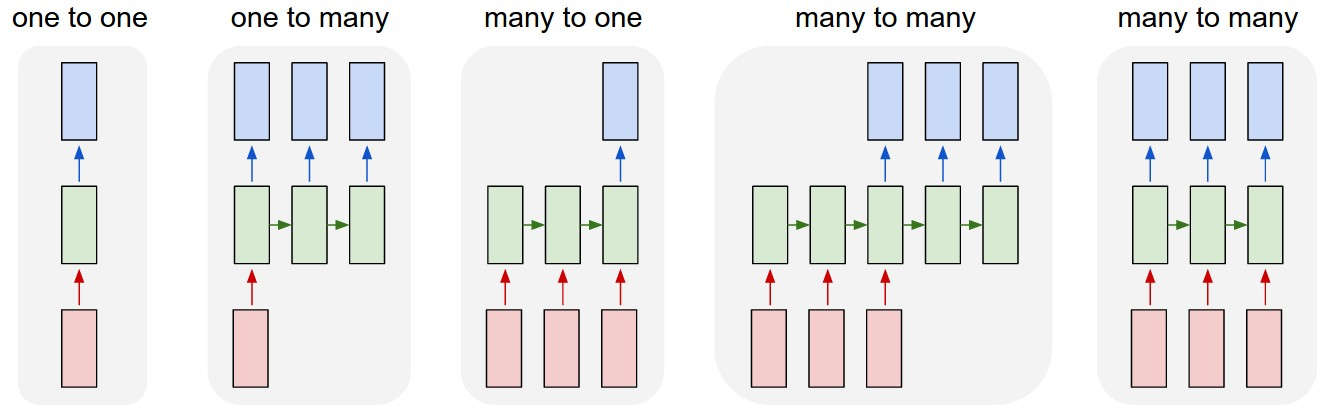

**Άσκηση 1**

Συμπληρώστε τη παρακάτω κλάση RNN, ώστε η συνάρτηση *forward_pass* να υπολογίζει τη συνάρτηση *h_t* όπως ορίζεται παραπάνω (ΔΕ χρειάζεται να βάλετε πολώσεις). Συμπληρώστε ό,τι άλλο είναι απαραίτητο.

In [ ]:
# Vanilla RNN
class RNN(nn.Module):
    # Τι θα ορίζαμε εδώ?
    # Τι λείπει επίσης?
    def __init__(self, h, W_hh, W_xh, W_hy):
        super(RNN, self).__init__()
        self.W_hh = W_hh
        self.W_xh = W_xh
        self.W_hy = W_hy
        self.h = h   #hidden state
    def forward_pass(self, x):
      # Ανανεώστε το hidden state
      # Tip 1: Χρησιμοποιείστε τις συναρτήσης της numpy np.tanh και np.dot
      # Τip 2: Ως μεταβλητές χρησιμοποιείστε τις W_hh, W_xh
      self.h = np.tanh(np.dot(self.W_hh, self.h) + np.dot(self.W_xh, x))
      # Υπολογισμός του διανύσματος εξόδου
      y = np.dot(self.W_hy, self.h)
      return y

In [ ]:
# Οι πίνακες του RNN αρχικοποιούνται με τυχαίες τιμές
W_hh = torch.randn(2,2,2)
W_xh = torch.randn(2,2,2)
W_hy = torch.randn(2,2,2)
#Αρχικοποιούμε το hidden state με ένα διάνυσμα με μηδενικά
h = np.zeros_like(W_hh)
rnn = RNN(h,W_hh, W_xh, W_hy)
input = torch.randn(2, 2, 2)
y = rnn.forward_pass(input)
print(y)

[[[[[-0.23317853  1.2979294 ]
    [ 0.22078872  1.0600533 ]]

   [[-0.0741917  -1.2424319 ]
    [-0.45091972  0.00693857]]]


  [[[-0.32170668  0.98500264]
    [-0.54397905  0.5594566 ]]

   [[ 0.5210071  -0.841871  ]
    [ 0.60262716  0.05596252]]]]



 [[[[ 0.43752348 -1.8287048 ]
    [ 0.2246821  -1.30906   ]]

   [[-0.33016226  1.6744521 ]
    [-0.07610388 -0.04794884]]]


  [[[ 0.533663   -2.1663578 ]
    [ 0.34164798 -1.5247734 ]]

   [[-0.4523654   1.9729081 ]
    [-0.19038439 -0.06218011]]]]]


Character-Level Language Models
===================================================

Στη συνέχεια, θα χρησιμοποιήσουμε τα RNNs για να φτιάξουμε και να εκπαιδεύσουμε ένα Character-Level Language Model. Tα μοντέλα αυτά δέχονται σαν είσοδο ένα κομμάτι κειμένου (π.χ. ένα χαρακτήρα) και μπορούν να μοντελοποιήσουν τη πιθανοτική κατανομή του επόμενου χαρακτήρα στην ακολουθία που δίνεται ως είσοδο, με βάση τους προηγούμενους χαρακτήρες στην ακολουθία. Αυτό θα μας επιτρέψει να δημιουργήσουμε νέο κείμενο χαρακτήρα προς χαρακτήρα.

Για παράδειγμα, έστω ότι έχουμε μόνο ένα λεξιλόγιο από 4 πιθανά γράμματα, τα "h", "e", "l" και "ο", και επιθυμούμε να εκπαιδεύσουμε ένα RNN στην ακολουθία "hello", η οποία αποτελεί πηγή για 4 διαφορετικά παραδείγματα εκπαίδευσης:
*   Η πιθανότητα του "e" πρέπει θα πρέπει να είναι πιθανή δοθέντος του "h"
*   Η πιθανότητα του "l" πρέπει θα πρέπει να είναι πιθανή δοθέντος της ακολουθίας "he"
*   Η πιθανότητα του "l" πρέπει θα πρέπει να είναι επίσης πιθανή δοθέντος της ακολουθίας της "hel" και τέλος
*   Η πιθανότητα του "o" πρέπει θα πρέπει να είναι πιθανή δοθέντος του "hell".  

Πρακτικά, κάθε χαρακτήρας κωδικοποιείται σε ένα 1-of-k διάνυσμα, του οποίου όλες οι τιμές είναι μηδέν, εκτός από μια μόνο τιμή που βρίσκεται στη "θέση" ενός χαρακτήρα στο λεξιλόγιο ο οποίος έπεται στην ακολουθία. Οι κωδικοποιήσεις αυτές δίνονται μια-μια ως είσοδος στο RNN χρησιμοποιώντας την συνάρτηση ``` forward_pass```. Στη συνέχεια, θα παρατηρήσουμε μια ακολουθία από 4-διάστατα διανύσματα εξόδου (μια διάσταση για κάθε χαρακτήρα του λεξιλογίου), τα οποία ερμηνεύουμε ως τη τρέχουσα πιθανότητα που αποδίδει το RNN σε κάθε χαρακτήρα που έπεται στην ακολουθία. Παρακάτω απεικονίζεται ένα RNN με 4-διάστατα input και output layers και ένα hidden layer με 3 νευρώνες:

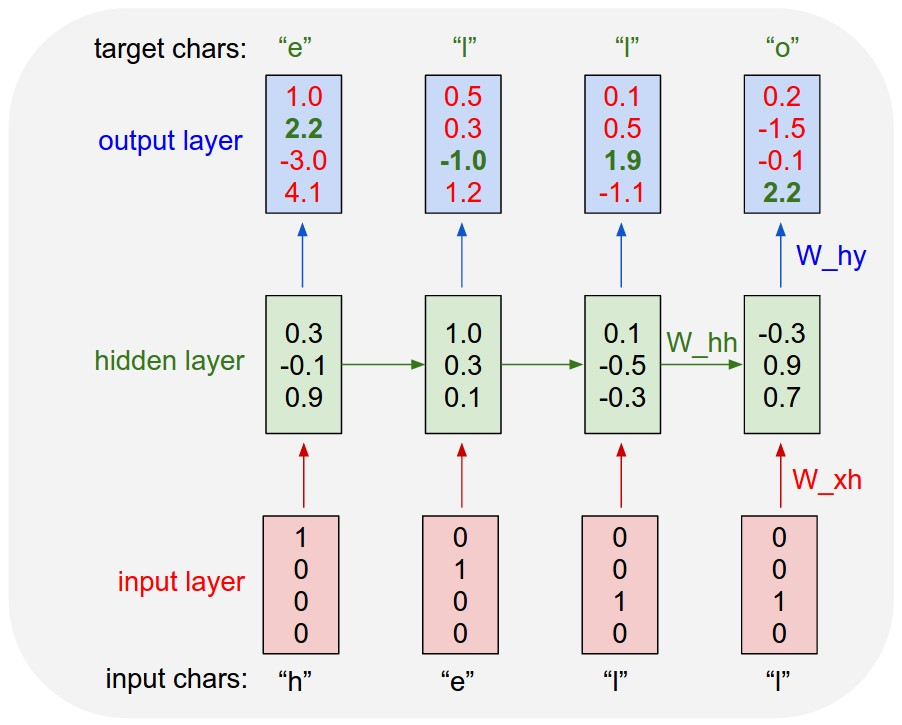

Στη παραπάνω εικόνα φαίνονται τα activations του ``` forward_pass``` όταν η είσοδος είναι η ακολουθία "hell". Το layer εξόδου περιέχει τις πιθανότητες που το RNN αποδίδει στον επόμενο πιθανό χαρακτήρα. Έπειτα από την εκπαίδευση θέλουμε να δούμε τις πράσινες τιμές να αυξάνονται (στις θέσεις των αντίστοιχων/"σωστών" χαρακτήρων) και τις κόκκινες τιμές να μειώνονται. Επιπλέον, θα πρέπει να προσθέσουμε ένα *softmax* layer για να κανονικοποιήσουμε τις παραγώμενες πιθανότητες στο $[0,1]$.


Στη συνέχεια, θα χρησιμοποιήσουμε ένα Character-Level RNN για τη κατηγοριοποίηση ονομάτων στη γλώσσα προέλευσής τους. Ειδικότερα, το μοντέλο που θα δημιουργήσουμε αποτελεί ένα Natural Language Processing (NLP) δίκτυο, το οποίο επεξεργάζεται σύντομο γραπτό κείμενο φυσικής γλώσσας. Το NLP μας θα εκπαιδευτεί σε ένα dataset από μερικές χιλιάδες επώνυμα από 18 γλώσσες και θα προβλέπει από ποια γλώσσα προέρχεται ένα όνομα με βάση την ορθογραφία του.  



**Προετοιμασία των δεδομένων**

Στο φάκελο ```data/names``` υπάρχουν 18 αρχεία κειμένου με ονομασία ``` [language].txt```. Κάθε φάκελος περιλαμβάνει ένα σύνολο από ονόματα, ένα όνομα ανά γραμμή, κυρίως με λατινικούς χαρακτήρες. Τους χαρακτήρες αυτούς θα πρέπει να τους μετατρέψουμε από Unicode σε ASCII κωδικοποίηση. Στη συνέχεια, θα δημιουργήσουμε ένα λεξικό από λίστες ονομάτων ανά γλώσσα,  ```{language: [names ...]}```. Οι γενικευμένες μεταβλητές "category" (που αντιστοιχεί στη γλώσσα) και "line" (που αντιστοιχεί στο υπό εξέταση επώνυμο κάθε φορά) χρησιμοποιούνται για λόγους επεκτασιμότητας.

In [ ]:
# @title Πατήστε για άνοιγμα
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('data/names/*.txt'))

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Μετατροπή μιας Unicode συμβολοσειράς σε ASCII
# https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# Δημιουργία του λεξικού category_lines, μια λιστα
# από ονόματα ανά γλώσσα
category_lines = {}
all_categories = []

# Διάβασμα ενός αρχείου και χωρισμός του ανά γραμμή
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

['data/names/Spanish.txt', 'data/names/French.txt', 'data/names/Dutch.txt', 'data/names/Czech.txt', 'data/names/Scottish.txt', 'data/names/Korean.txt', 'data/names/Russian.txt', 'data/names/German.txt', 'data/names/Portuguese.txt', 'data/names/Irish.txt', 'data/names/English.txt', 'data/names/Arabic.txt', 'data/names/Italian.txt', 'data/names/Chinese.txt', 'data/names/Greek.txt', 'data/names/Vietnamese.txt', 'data/names/Japanese.txt', 'data/names/Polish.txt']
Slusarski


Συνεπώς, ορίσαμε το λεξικό ```category_lines```, το οποίο περιέχει αντιστοιχίσεις κάθε κατηγορίας/κλάσης (γλώσσας) σε μια λίστα από γραμμές (επώνυμα). Επιπλέον, δημιουργούμε και τη λίστα ```all_categories``` που αποτελεί μια λίστα των γλωσσών, και τη λίστα ```n_categories``` για μετέπειτα αναφορά.

In [ ]:
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


**Μετατροπή των ονομάτων σε τένσορες**

Έπειτα από την οργάνωση των ονομάτων, θα πρέπει να τα μετατρέψουμε σε τένσορες προκειμένου να μπορούμε να τους χρησιμοποιήσουμε.

Για το συμβολισμό ενός γράμματος χρησιμοποιούμε "one-hot" διανύσματα με μέγεθος ```<1 x n_letters>```. Ένα one-hot διάνυσμα περιέχει μηδενικά εκτός από έναν άσσο στο θέση του τρέχοντος γράμματος, π.χ. ```b =<0 1 0 0 0 ...>```.

Επομένως, για να δημιουργήσουμε μια λέξη ενώνουμε μερικά one-hot διανύσματα και δημιουργούμε ένα 2D πίνακα διαστάσεων ```<line_length x 1 x n_letters>```. H έξτρα διάσταση "1" που προσθέσαμε απαιτείται διότι η Pytorch επεξεργάζεται τα δεδομένα σε batches (παρτίδες) και εδώ το batch size είναι 1.

In [ ]:
import torch

# Βρείτε τη θέση του γράμματος από τη λίστα all_letters, π.χ. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Για λόγους testing, μετατρέψτε ένα γράμμα σε ένα τένσορα <1 x n_letters>
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Μετατρέψτε μια γραμμη σε ένα τένσορα <line_length x 1 x n_letters>,
# ή σε ένα πίνακα (array) από one-hot διανύσματα γραμμάτων
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


**Άσκηση 2 - Δημιουργία του Μοντέλου**


Υλοποιήστε ένα απλό RNN μοντέλο με:
*   3 γραμμικά layers που εφαρμόζωνται στην είσοδο και στo διάνυσμα κατάστασης
*   ένα ```LogSoftmax``` layer μετά την έξοδο

Μη ξεχάσετε να υλοποιήσετε τη ```forward``` συνάρτηση του δικτύου. Δώστε προσοχή στα tips που δίνονται.




In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        # Oρισμός του μητρώου input-to-hidden
        self.W_xh = nn.Linear(input_size, hidden_size)
        # Oρισμός του μητρώου hidden-to-hidden
        self.W_hh = nn.Linear(hidden_size, hidden_size)
        # Oρισμός του μητρώου hidden-to-output
        self.W_hy = nn.Linear(hidden_size, output_size)
        # Ορισμός του LogSoftmax layer
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x, h):
        # Κάθε hidden layer θα υλοποιεί τη συνάρτηση h_t, χωρίς biases
        h = F.tanh(self.W_xh(x) + self.W_hh(h))
        output = self.W_hy(h)
        output = self.softmax(output)
        return output, hidden

    # Αρχικοποίηση των hidden layers
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [ ]:
n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

Για να εκτελέσουμε ένα "βήμα" αυτού του δικτύου θα πρέπει να δώσουμε ως είσοδο ένα τένσορα που θα περιέχει το τρέχον γράμμα, και το προηγούμενο διάνυσμα κατάστασης το οποίο αρχικοποιείται με μηδενικές τιμές. Η έξοδος του μοντέλου αποτελεί τη πιθανότητα να ανήκει το γράμμα σε κάθε μια από τις γλώσσες (κλάσεις) που αναγνωρίζει το μοντέλο, και το διάνυσμα κατάστασης που το αποθηκεύουμε για να το δώσουμε ως είσοδο στο επόμενο βήμα (εξ'ου και η επαναληπτικότητα του μοντέλου).

In [ ]:
input = letterToTensor('A')
# Αρχικό διάνυσμα κατάστασης
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

Για λόγους απόδοσης δεν επιθυμείται η δημιουργία ενός τένσορα για κάθε γράμμα σε κάθε βήμα, συνεπώς θα χρησιμοποιήσουμε τη συνάρτηση ```lineToTensor``` αντί για τη ```letterToTensor``` ώστε να δημιουργήσουμε ένα τένσορα για κάθε γραμμή (επώνυμο) του λεξικού μας. Μπορούμε να βελτιστοποιήσουμε τον υπολογισμό ενός βήματος του μοντέλου μας με το να υπολογίζουμε εκ των προτέρων batches από τένσορες (παρτίδες από γραμμές/επώνυμα).

In [ ]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-3.0000, -2.9081, -2.9352, -2.9587, -3.0311, -2.9347, -2.9198, -2.9952,
         -2.7829, -2.8910, -2.9060, -2.7461, -2.9053, -2.8036, -2.8798, -2.8388,
         -2.8759, -2.7700]], grad_fn=<LogSoftmaxBackward0>)


Όπως θα παρατηρήσετε, η έξοδος είναι ένας τένσορας με διαστάσεις ```<1 x n_categories>```, όπου κάθε στοιχείο του είναι η πιθανότητα μιας κλάσης.

**Εκπαίδευση**

Προτού εκπαιδεύσουμε το μοντέλο μας θα δημιουργήσουμε μερικές βοηθητικές συναρτήσεις. Η ```categoryFromOutput``` θα μας βοηθήσει να ερμηνέυσουμε την έξοδο του δικτύου, δηλαδή τη πιθανότητα μια λέξη να ανήκει σε μια γλώσσα. Μπορούμε να χρησιμοποιήσουμε τη συνάρτηση ```Tensor.topk``` για να πάρουμε τη θέση της πιθανότητας με τη μεγαλύτερη τιμή.

In [ ]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Arabic', 11)


Στη συνέχεια, δημιουργούμε τη συνάρτηση ```randomTrainingExample``` για την επιλογή ενός τυχαίου δείγματος από το dataset μας (ένα επώνυμο και τη γλώσσα στην οποία ανήκει).

In [ ]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

# Καλούμε 10 φορές την randomTrainingExample για να λάβουμε 10 τυχαία
# δείγματα από το dataset μας
for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = Irish / line = Keefe
category = Japanese / line = Kaminaga
category = Irish / line = Mulryan
category = Greek / line = Close
category = German / line = Volk
category = German / line = Wiegand
category = Dutch / line = Klerx
category = Spanish / line = Roldan
category = German / line = Halle
category = Chinese / line = Man


Επιπλέον, ως loss function θα χρησιμοποιήσουμε την ```criterion = nn.NLLLoss()```, η οποία είναι συμβατή με το τελευταίο layer του δικτύου μας, το ```nn.LogSoftmax```.

In [ ]:
criterion = nn.NLLLoss()

Προχωράμε στη δημιουργία του βρόγχου εκπαίδευσης. Σε κάθε βρόγχο:


1.   Θα δημιουργούμε τένσορες εισόδου και εξόδου
2.   Θα αρχικοποιούμε το διάνυσμα κατάστασης με μηδενικές τιμές
3.   Θα προσπελαύνουμε κάθε γράμμα και θα "κρατούμε" το διάνυσμα κατάστασης για τον υπολογισμό του επόμενου γράμματος
4.   Θα συγκρίνουμε τις προβλέψεις του δικτύου με αυτές της πραγματικής εξόδου
5.   Θα καλούμε τη συνάρτηση του backpropagation αλγορίθμου
6.   Και θα επιστρέφουμε την έξοδο του δικτύου και τη τιμή του loss function.



**Άσκηση 3**

Συμπληρώστε το ακόλουθο training loop (συνάρτηση ```train```) σύμφωνα με τις οδηγίες που δίνονται στα σχόλια του κώδικα.

In [ ]:
# Θέστε μια τιμή για το learning_rate. Αν είναι πολύ υψηλή η τιμή ενδεχομένως να
# παραχθούν exploding gradients (πολύ μεγάλες παράγωγοι που αυξάνονται σε κάθε
# εποχή εκπαίδευσης), ενώ εάν είναι πολύ μικρή ενδέχεται το μοντέλο να μη "μαθαίνει".
learning_rate = 0.005

# 1) Έχουμε ήδη δημιουργήσει τους τένσορες εισόδου (line_tensor) και
# εξόδου (category_tensor -> η πραγματική έξοδος που αναμένεται)
def train(category_tensor, line_tensor):

    # 2) Αρχικοποιείστε το διάνυσμα κατάστασης με μηδενικές τιμές
    # Τip: χρησιμοποιείστε τη συνάρτηση initHidden που ορίσαμε παραπάνω
    hidden = rnn.initHidden()

    # Αρχικοποιούμε τις παραγώγους με μηδενικές τιμές επίσης
    rnn.zero_grad()


    for i in range(line_tensor.size()[0]):
        # 3) Προσπελάστε κάθε γράμμα ενός ονόματος
        output, hidden = rnn(line_tensor[i], hidden)

    # 4) Συγκρίνετε τις προβλέψεις του δικτύου με αυτές της πραγματικής εξόδου
    loss = criterion(output, category_tensor)

    # 5) Καλέστε τη συνάρτηση του backpropagation αλγορίθμου
    loss.backward()

    # Προσθέτουμε τις παραμέτρους των gradients στις τιμές τους και τις
    # πολλαπλασιάζουμε με το learning rate.
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    # 6) Επιστρέψτε την έξοδο του δικτύου και τη τιμή του loss
    return output, loss.item()

Έπειτα, εκτελούμε τη συνάρτηση ```train``` με είσοδο μερικά δείγματα από το dataset μας. Εφόσον η ```train``` επιστρέφει τόσο την έξοδο αλλά και το loss του δικτύου, μπορούμε να εκτυπώνουμε τις προβλέψεις του μοντέλου και να "κρατάμε" τις τιμές του loss για να τις κάνουμε plot. Επειδή τα δείγματα του training dataset είναι μερικές χιλιάδες, εκτυπώνουμε κάθε ```print_every``` δείγματα και υπολογίζουμε το μέσο loss.

In [ ]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000



# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print ``iter`` number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 7s) 2.8058 Steube / Irish ✗ (German)
10000 10% (0m 14s) 0.8382 Sfakianos / Greek ✓
15000 15% (0m 22s) 1.6528 Duong / Chinese ✗ (Vietnamese)
20000 20% (0m 29s) 2.0950 Woodley / Scottish ✗ (English)
25000 25% (0m 36s) 2.5828 Saliba / Japanese ✗ (Arabic)
30000 30% (0m 43s) 1.8187 Roma / Japanese ✗ (Spanish)
35000 35% (0m 51s) 1.9254 Blanco / Portuguese ✗ (Spanish)
40000 40% (0m 57s) 2.7539 Smits / Greek ✗ (Dutch)
45000 45% (1m 5s) 1.9396 Macleod / Arabic ✗ (Scottish)
50000 50% (1m 12s) 2.8193 Favreau / Vietnamese ✗ (French)
55000 55% (1m 20s) 4.1007 Meadhra / Czech ✗ (Irish)
60000 60% (1m 28s) 1.6864 Orellana / Spanish ✓
65000 65% (1m 35s) 2.8043 Hicks / Greek ✗ (English)
70000 70% (1m 44s) 2.4752 Khouri / Italian ✗ (Arabic)
75000 75% (1m 52s) 1.2200 Vinci / Italian ✓
80000 80% (2m 0s) 1.9756 Simon / Irish ✓
85000 85% (2m 8s) 1.3786 Rumisek / Polish ✗ (Czech)
90000 90% (2m 16s) 1.1565 Vincent / French ✓
95000 95% (2m 24s) 2.9163 Garcon / Scottish ✗ (French)
100000 100% (2m 32s

**Άσκηση 4**

Κατασκευάστε το διάγραμμα για της τιμής του loss του μοντέλου χρησιμοποιώντας τη λίστα ```all_losses```.  

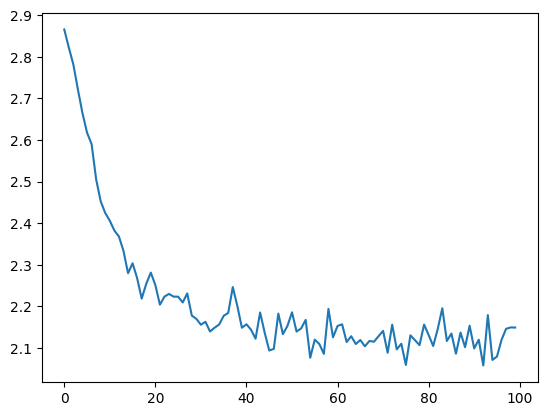

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

Long Short-Term Memory Networks
===================================================

Τα Long Short-Term Memory (LSTM) μοντέλα μπορούν να "μάθουν" μακροχρόνιες (long-term) εξαρτήσεις από τα δεδομένα που δέχονται ως είσοδο. Για παράδειγμα μπορούν να χρησιμοποιηθούν για τη πρόβλεψη κίνησης (motion prediction) βασιζόμενα σε χρονικές εξαρτήσεις των χρονοσειρών κίνησης που επεξεργάζονται ("θυμούνται" παρελθοντική πλήροφορία για μεγάλα χρονικά διαστήματα). Τα LSTMs είναι RNNs που χρησιμοποιούν μια πιο αποδοτική update function για τον υπολογισμό του hidden state, καθώς και ένα λιγάκι διαφοροποιημένο backpropagation αλγόριθμο. Όλα τα παραπάνω συνιστούν σε μοντέλα λειτουργούν καλύτερα στη πράξη γι'αυτό και χρησιμοποιούνται ευρέως.

Τα κλασσικά RNN μοντέλα δημιουργούν μια αλυσίδα από επαναλαμβανόμενα modules νευρωνικών δικτύων, και κάθε module έχει πολύ απλή δομή, όπως το να περιλαμβάνει ένα tanh layer, όπως είδαμε και παραπάνω και φαίνεται στο παρακάτω διάγραμμα:
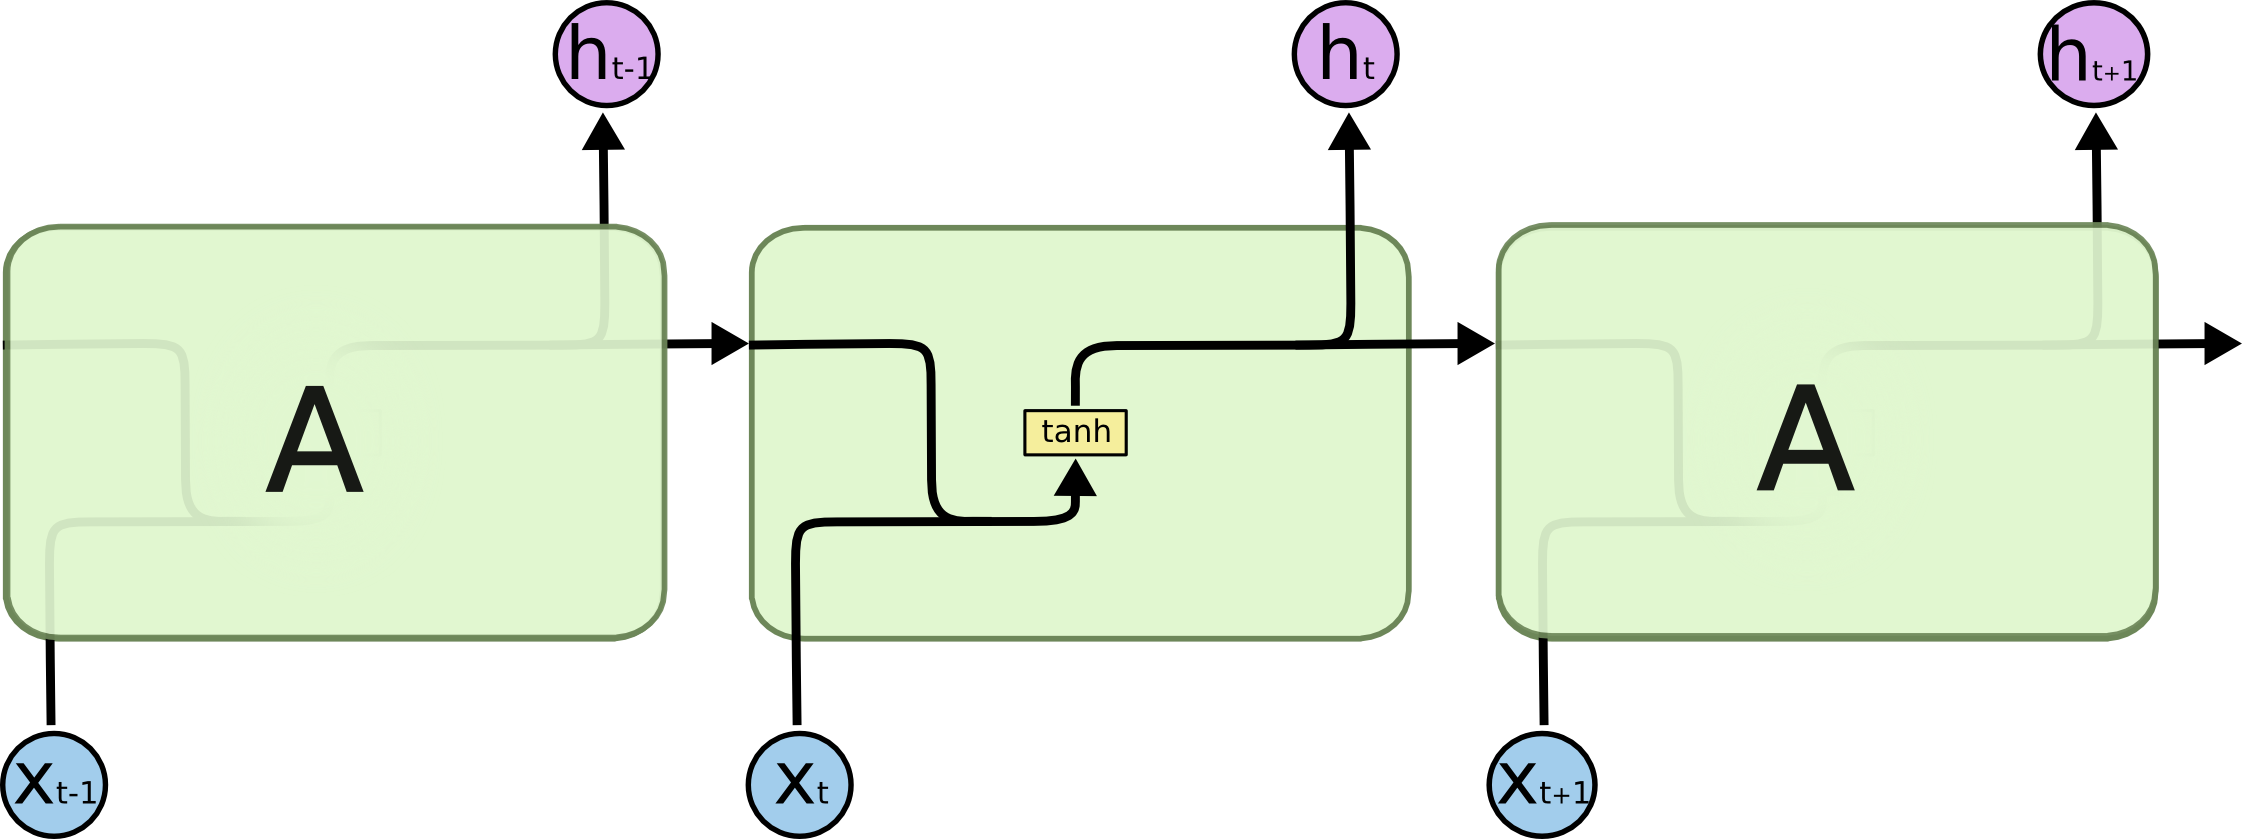



Τα LSTMs ακολουθούν την ίδια αρχιτεκτονική με τα RNNs, με τη διαφορά ότι αντί να περιλαμβάνουν ένα RNN layer σε κάθε επαναλαμβανόμενο module, περιλαμβάνουν 4, τα οποία "επικοινωνούν" μεταξύ τους με τέτοιο τρόπο ώστε να επιτύχουν το long-term memory αποτέλεσμα:

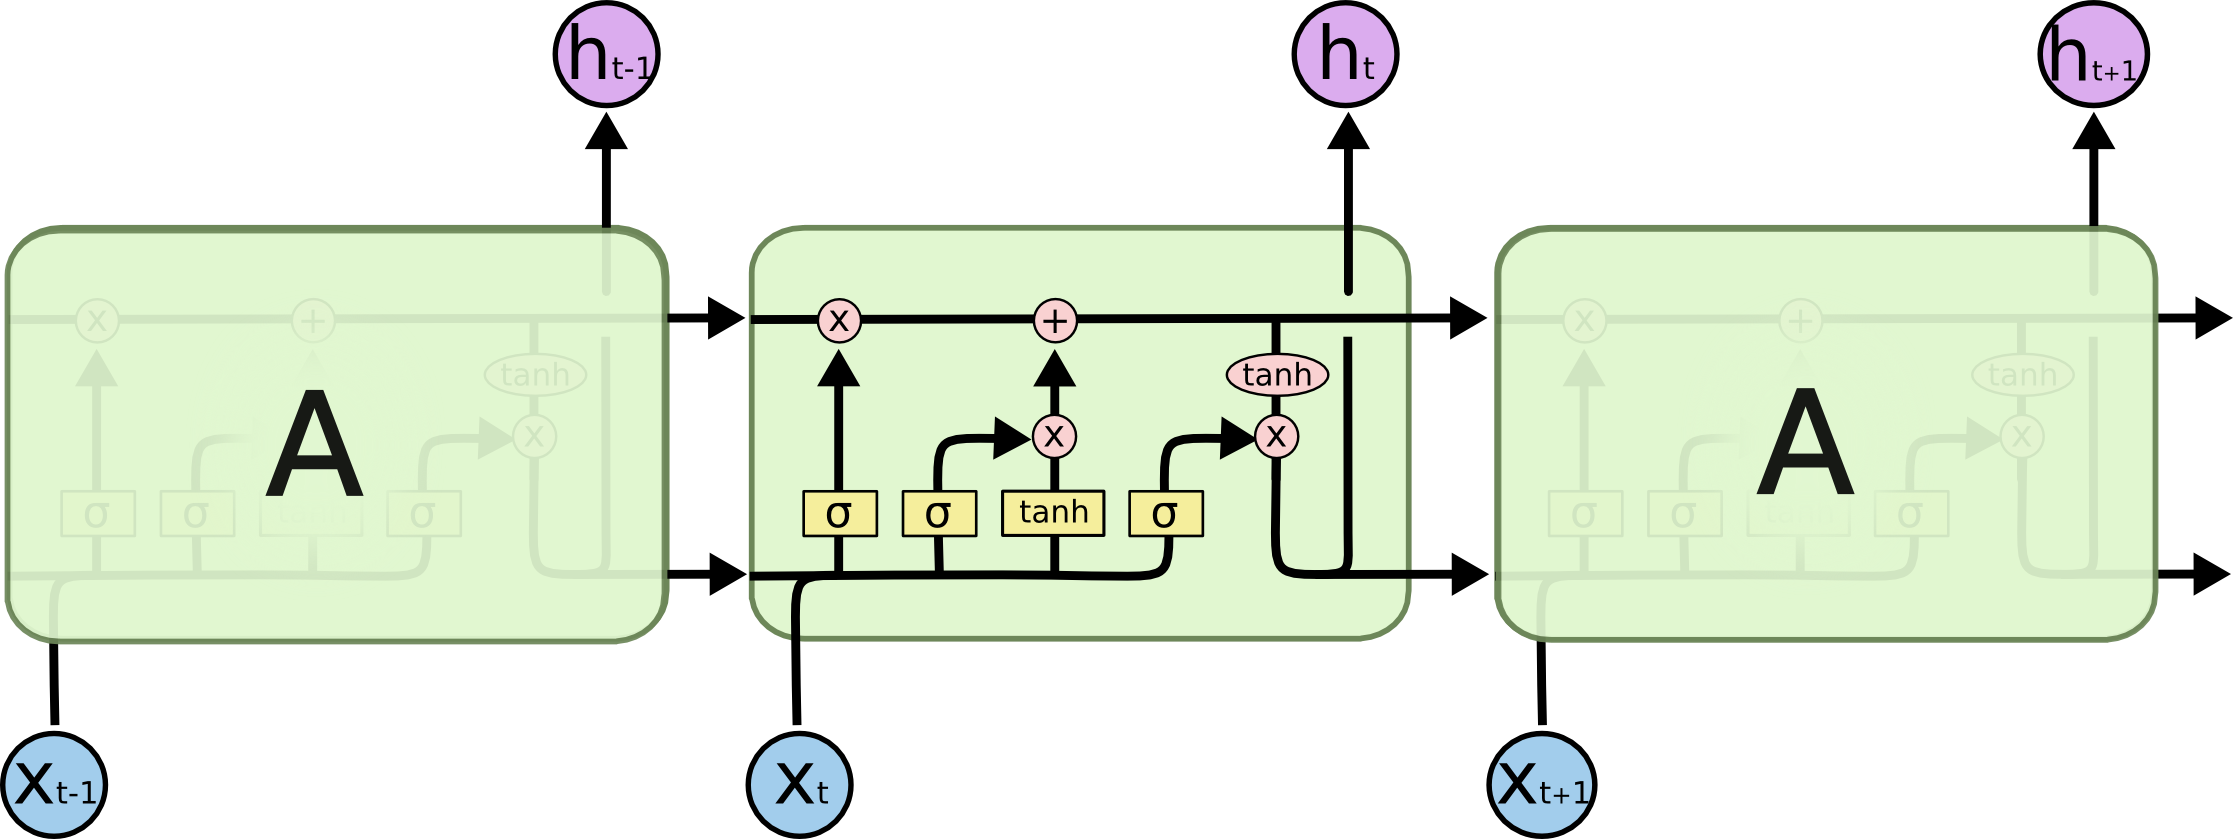








Στην ακόλουθη εικόνα υπάρει η επεξήγη των συμβολισμών των 2 προηγούμενων εικόνων:

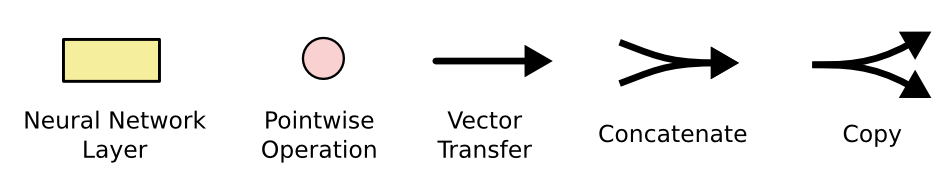

Σύμφωνα με την παραπάνω εικόνα, κάθε γραμμή (βελάκι) συμβολίζει την μεταφορά ενός ολόκληρου τένσορα από την έξοδο ενός κόμβου του δικτύου στις εισόδους των επόμενων κόμβων. Οι ροζ κύκλοι συμβολίζουν πράξεις στοιχείο-προς-στοιχείο, όπως η πρόσθεση διανυσμάτων, ενώ τα κίτρινα κουτάκια είναι τα εκπαιδευόμενα layers του δικτύου. Οι γραμμές που ενωνονται συμβολίζουν τη συνένωση τενσόρων και οι γραμμές που διχοτομώνται συμβολίζουν την αντιγραφή τενσόρων και τη μεταφορά των αντιγράφων σε διαφορετικές τοποθεσίες.

Επομένως, όπως στα RNN έτσι και στη περίπτωση των LSTM, για κάθε στοιχείο μέσα σε μια ακολουθία ή χρονοσειρά, υπάρχει το αντίστοιχο
hidden state $h_t$, που περιέχει πληροφορία από αυθαίρετα σημεία της ακολουθίας που έχει "συναντήσει" νωρίτερα.

LSTMs στη Pytorch
----------------

Τα LSTM μοντέλα στη Pytorch δέχονται ως είσοδο τρισδιάστατους τένσορες. Η σημασιολογία των αξόνων αυτών των τενσόρων είναι σημαντική. Ο πρώτος άξονας αποτελεί την ακολουθία, ο δεύτερος σηματοδοτεί τις θέσεις των instances του training dataset σε ένα batch, και ο τρίτος άξονας σηματοδοτεί τα features της εισόδου. Έστω ότι ο δεύτερος άξονας έχει διάσταση 1 (δηλαδή έχουμε ένα μονο δείγμα από το dataset) και θέλουμε να δώσουμε ως είσοδο στο μοντέλο μας την ακολουθία \"The cow jumped\", τότε η είσοδός μας θα μοιάζει ως εξής:

$$\begin{aligned}
\begin{bmatrix}
\overbrace{q_\text{The}}^\text{row vector} \\
q_\text{cow} \\
q_\text{jumped}
\end{bmatrix}
\end{aligned}$$

Θυμηθείτε ότι υπάρχει και μια $2^η$ διάσταση με μέγεθος 1.

Επιπρόσθετα, το μοντέλο μπορεί να προσπελάσει και μια ολόκληρη ακολουθία, αν θέσουμε το μέγεθος του $1^{ου}$ άξονα ίσο με 1.

Ας δούμε ένα παράδειγμα ενός απλού LSTM μοντέλου στη Pytorch:


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [ ]:
# Η διάσταση εισόδου είναι 3, όπως και η διάσταση εξόδου
lstm = nn.LSTM(3, 3)
# Δημιουργούμε μια ακολουθία μεγέθους 5
inputs = [torch.randn(1, 3) for _ in range(5)]

# Αρχικοποιούμε τη hidden state
hidden = (torch.randn(1, 1, 3),
          torch.randn(1, 1, 3))
for i in inputs:
    # Προσπελαύνουμε την ακολουθία στοιχείο-προς-στοιχείο
    # και έπειτα από κάθε βήμα, αποθηκεύουμε τη hidden state
    # στη μεταβλητή hidden.
    # Η συνάρτηση view είναι παρόμοια με τη reshape της numpy
    # δηλαδή αλλάζει τις διαστάσεις ενός τένσορα και μάλιστα
    # χωρίς να καταλαμβάνει μνήμη.
    out, hidden = lstm(i.view(1, 1, -1), hidden)

# Προσθέτουμε τη 2η διάσταση
# Η συνάρτηση cat συνδέει μια ακολουθία από τένσορες
inputs = torch.cat(inputs).view(len(inputs), 1, -1)
# Καθαρίζουμε τη hidden state
hidden = (torch.randn(1, 1, 3), torch.randn(1, 1, 3))

# Εναλλακτικά, μπορούμε να προσπελάσουμε ολόκληρη την ακολουθία με τη μια.
# Η πρώτη τιμή που επιστρέφει το LSTM δίκτυό μας είναι όλες οι hidden states\
# της ακολουθίας. Η δεύτερη τιμή που επιστρέφεται είναι η πιο πρόσφατη
# hidden state (αν συγκρίνετε το τελευταίο κομμάτι του τένσορα "out" με
# αυτό του "hidden" θα παρατηρήσετε ότι είναι το ίδιο). Ο λόγος για τον
# οποίο συμβαίνει αυτό είναι πως ο τένσορας "out" μας δίνει πρόσβαση
# σε όλες τις hidden states της ακολουθίας, ενώ ο τένσορας "hidden" μας
# επιτρέπει να συνεχίσουμε τη προσπέλαση της ακολουθίας και να εφαρμόσουμε
# το backpropagation αλγόριθμο με το να τον περάσουμε ως όρισμα
# στο LSTM μοντέλο μας σε μια μεταγενέστερη στιγμή.
out, hidden = lstm(inputs, hidden)
print(out)
print(hidden)

tensor([[[-0.0187,  0.1713, -0.2944]],

        [[-0.3521,  0.1026, -0.2971]],

        [[-0.3191,  0.0781, -0.1957]],

        [[-0.1634,  0.0941, -0.1637]],

        [[-0.3368,  0.0959, -0.0538]]], grad_fn=<MkldnnRnnLayerBackward0>)
(tensor([[[-0.3368,  0.0959, -0.0538]]], grad_fn=<StackBackward0>), tensor([[[-0.9825,  0.4715, -0.0633]]], grad_fn=<StackBackward0>))


**Άσκηση 5**

Υλοποιείστε ξανά την Άσκηση 2, δηλαδή ένα RNN το οποίο όμως θα έχει:

*   3 LSTM layers που εφαρμόζωνται στην είσοδο και στo διάνυσμα κατάστασης
*   ένα ```LogSoftmax``` layer μετά την έξοδο

Προσοχή στις διαστάσεις της εισόδου ενός LSTM layer (συμβουλευτείτε το documentation της Pytorch).

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()

        self.hidden_size = hidden_size

        # Oρισμός του μητρώου input-to-hidden
        self.W_xh = nn.LSTM(input_size, hidden_size, num_layers=1)
        # Oρισμός του μητρώου hidden-to-hidden
        self.W_hh = nn.LSTM(hidden_size, hidden_size, num_layers=1)
        # Oρισμός του μητρώου hidden-to-output
        self.W_hy = nn.LSTM(hidden_size, output_size, num_layers=1)
        # Ορισμός του LogSoftmax layer
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x, h):
        # Κάθε hidden layer θα υλοποιεί τη συνάρτηση h_t, χωρίς biases
        h = F.tanh(self.W_xh(x) + self.W_hh(h))
        output = self.W_hy(h)
        output = self.softmax(output)
        return output, hidden

    # Αρχικοποίηση των hidden layers
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [ ]:
n_hidden = 128
lstm = LSTM(n_letters, n_hidden, n_categories)

**Άσκηση 6**

Υλοποιείστε ξανά την Άσκηση 5, αλλά αυτή τη φορά το μοντέλο θα αποτελεί ένα CNN-to-LSTM μοντέλο με:

*   2 CNN (Conv1d) layers με μέγεθος ```<input_size, 128, 2, 1>``` κάθε ένα από τα οποία θα ακολουθείται από ένα max pooling (MaxPool1d) layer διαστάσεων ```<2, 2>```
*   ένα LSTM layer μεγέθους  ```<128, hidden_size, 1>```
*   ένα linear layer με μέγεθος ```<hidden_size, output_size>```

Μη ξεχάσετε να υλοποιήσετε την εξίσωση forward του μοντέλου, όπου η έξοδος κάθε "κομματιού" (CNN, LSTM κλπ.) του μοντέλου θα πρέπει να "περνάει" σειριακά στο επόμενο module.

In [ ]:
class CNN_to_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CNN_to_LSTM, self).__init__()

        self.hidden_size = hidden_size

        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=input_size, out_channels=128, kernel_size=2, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Conv1d(in_channels=128, out_channels=128, kernel_size=2, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2)
        )
        self.lstm = nn.LSTM(input_size=128, hidden_size=hidden_size, num_layers=1)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out_cnn = self.cnn(x)
        out_lstm, _ = self.lstm(out_cnn)
        out = self.fc(out_lstm[:, -1, :])
        return out

    # Αρχικοποίηση των hidden layers
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [ ]:
n_hidden = 128
cnn_to_lstm = CNN_to_LSTM(n_letters, n_hidden, n_categories)